<a href="https://colab.research.google.com/github/brunodeoli/dio-baires-transfer-learning/blob/main/transfer_learning_dio_baires_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import random
import keras
import numpy as np
import pandas as pd
import tensorflow as tf

import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.api.preprocessing import image
from keras.api.applications import MobileNetV2
from keras.api.models import Sequential
from keras.api.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.api.models import Model

In [ ]:
data = "cats_vs_dogs"
(x_train, x_test), dataset_info = tfds.load(data, split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.RFL4FZ_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
def preprocessing(image, label):
    image = tf.image.resize(image, (160, 160))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

x_train = x_train.map(preprocessing).batch(32).prefetch(tf.data.AUTOTUNE)
x_test = x_test.map(preprocessing).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model = MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights="imagenet")
model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train,
                    validation_data=x_test,
                    epochs=3)

Epoch 1/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 488s 828ms/step - accuracy: 0.9573 - loss: 0.1092 - val_accuracy: 0.9796 - val_loss: 0.0577
Epoch 2/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 535s 919ms/step - accuracy: 0.9811 - loss: 0.0511 - val_accuracy: 0.9794 - val_loss: 0.0585
Epoch 3/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 492s 845ms/step - accuracy: 0.9844 - loss: 0.0420 - val_accuracy: 0.9794 - val_loss: 0.0584


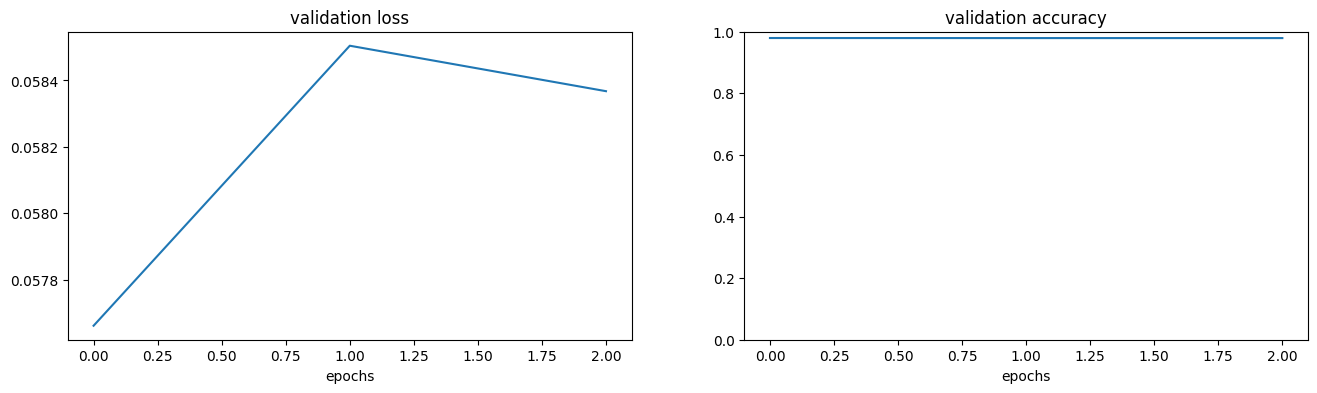

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.05836779996752739
Test accuracy: 0.979363739490509
